In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'Model/keypoint.csv'
model_save_path = 'Model/keypoint_classifier.keras'
tflite_save_path = 'Model/keypoint_classifier.tflite'

# Set number of classes

In [3]:
from constants import KEYPOINT_CLASSES
NUM_CLASSES = len(KEYPOINT_CLASSES) # Determines number of classes based on the KEYPOINT_CLASSES dictionary  

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/42 ━━━━━━━━━━━━━━━━━━━━ 35s 874ms/step - accuracy: 0.1875 - loss: 1.9511
Epoch 1: saving model to Model/keypoint_classifier.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2040 - loss: 1.9168 - val_accuracy: 0.2569 - val_loss: 1.7851
Epoch 2/1000
 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2422 - loss: 1.7987
Epoch 2: saving model to Model/keypoint_classifier.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2596 - loss: 1.7688 - val_accuracy: 0.4318 - val_loss: 1.6171
Epoch 3/1000
 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2812 - loss: 1.7556
Epoch 3: saving model to Model/keypoint_classifier.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3128 - loss: 1.6615 - val_accuracy: 0.5207 - val_loss: 1.4758
Epoch 4/1000
 1/42 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4297 - loss: 1.5250
Epoch 4: saving model to Model/keypoint_classifier.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3665 - loss: 1.5522 - va

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9245 - loss: 0.3107


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[3.5704315e-02 6.4346090e-02 3.8977918e-01 6.9473977e-03 2.6845714e-01
 2.3438416e-01 3.8171047e-04]
2


# Confusion matrix

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step


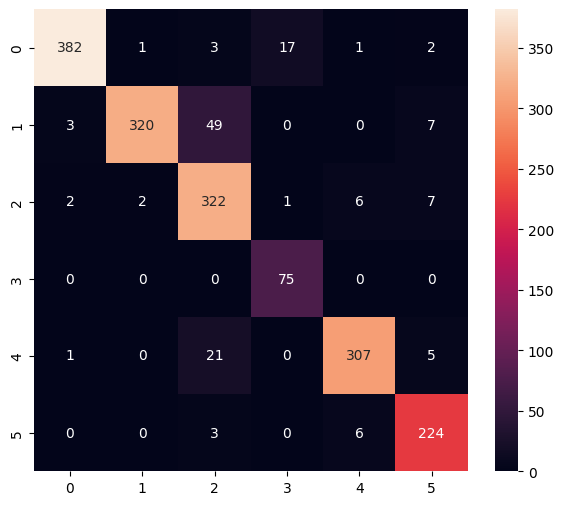

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       406
           1       0.99      0.84      0.91       379
           2       0.81      0.95      0.87       340
           3       0.81      1.00      0.89        75
           4       0.96      0.92      0.94       334
           5       0.91      0.96      0.94       233

    accuracy                           0.92      1767
   macro avg       0.91      0.94      0.92      1767
weighted avg       0.93      0.92      0.92      1767



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\hugos\AppData\Local\Temp\tmp5dya7qob\assets


INFO:tensorflow:Assets written to: C:\Users\hugos\AppData\Local\Temp\tmp5dya7qob\assets


Saved artifact at 'C:\Users\hugos\AppData\Local\Temp\tmp5dya7qob'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  2761855520592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761855521168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761855518864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761855532496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761855532880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2761855530576: TensorSpec(shape=(), dtype=tf.resource, name=None)


6668

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 997 μs


Each item in the array represents the LIKELIHOOD of each value being called.

In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.5704326e-02 6.4346068e-02 3.8977918e-01 6.9473977e-03 2.6845700e-01
 2.3438421e-01 3.8171047e-04]
2
